In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv('.//HDFCBANK.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638120e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952260e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704090e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432170e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420160e+12,NaN,NaN,NaN


In [5]:
df.tail(15)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4959,2019-12-10,HDFCBANK,EQ,1242.95,1251.00,1253.65,1245.10,1250.10,1249.50,1249.14,4894450,6.113860e+14,137774.0,3433356.0,0.7015
4960,2019-12-11,HDFCBANK,EQ,1249.50,1250.10,1254.00,1242.50,1250.55,1248.75,1248.04,5527321,6.898340e+14,160384.0,4132402.0,0.7476
4961,2019-12-12,HDFCBANK,EQ,1248.75,1253.00,1269.45,1253.00,1265.80,1263.60,1261.92,6456574,8.147700e+14,142217.0,4174002.0,0.6465
4962,2019-12-13,HDFCBANK,EQ,1263.60,1265.00,1272.35,1259.25,1263.10,1263.85,1266.95,5887593,7.459260e+14,104179.0,4094699.0,0.6955
4963,2019-12-16,HDFCBANK,EQ,1263.85,1269.25,1270.00,1248.20,1258.70,1257.35,1256.17,5663788,7.114680e+14,246978.0,3778135.0,0.6671
4964,2019-12-17,HDFCBANK,EQ,1257.35,1260.00,1274.80,1255.35,1271.75,1271.10,1267.95,6213677,7.878640e+14,169567.0,4315153.0,0.6945
4965,2019-12-18,HDFCBANK,EQ,1271.10,1283.00,1299.00,1273.65,1292.70,1292.35,1287.03,8723586,1.122750e+15,201690.0,5314964.0,0.6093
4966,2019-12-19,HDFCBANK,EQ,1292.35,1305.00,1305.50,1286.10,1288.50,1288.80,1296.05,6509188,8.436210e+14,151485.0,3523544.0,0.5413
4967,2019-12-20,HDFCBANK,EQ,1288.80,1288.75,1299.60,1280.05,1296.45,1296.70,1292.36,7513022,9.709490e+14,141458.0,5167224.0,0.6878
4968,2019-12-23,HDFCBANK,EQ,1296.70,1299.00,1304.00,1288.80,1301.50,1302.40,1298.01,5097891,6.617100e+14,126370.0,3173217.0,0.6225


In [6]:
df.set_index('Date',inplace=True)

In [7]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638120e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952260e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704090e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432170e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420160e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,HDFCBANK,EQ,1302.40,1298.60,1301.10,1286.95,1290.00,1289.15,1293.83,3589604,4.644340e+14,91053.0,2207659.0,0.6150
2019-12-26,HDFCBANK,EQ,1289.15,1289.70,1291.85,1264.65,1269.85,1270.45,1274.91,7474879,9.529780e+14,126918.0,4019243.0,0.5377
2019-12-27,HDFCBANK,EQ,1270.45,1272.00,1279.00,1270.00,1275.75,1275.00,1275.30,3546496,4.522860e+14,104711.0,2510820.0,0.7080


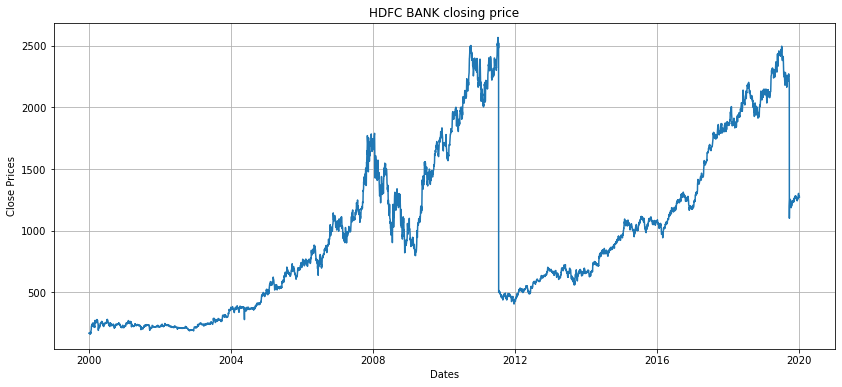

In [8]:
plt.figure(figsize=(14,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('HDFC BANK closing price')
plt.savefig('hdfc bank plot.jpeg',bbox_inches='tight', pad_inches=1)
plt.show()


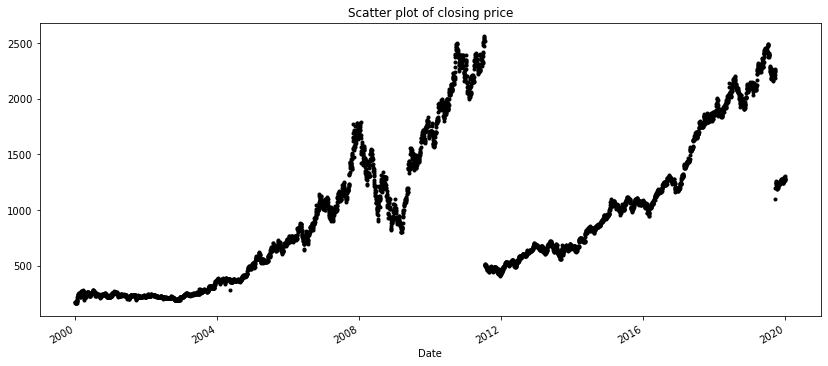

In [9]:
plt.figure(figsize=(14,6))
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.savefig('hdfc bank scatter.jpeg',bbox_inches='tight', pad_inches=1)
plt.show()


In [10]:
df_close

Date
2000-01-03     170.00
2000-01-04     173.80
2000-01-05     166.95
2000-01-06     168.30
2000-01-07     168.35
               ...   
2019-12-24    1289.15
2019-12-26    1270.45
2019-12-27    1275.00
2019-12-30    1282.15
2019-12-31    1272.10
Name: Close, Length: 4974, dtype: float64

# cheacking staionarity by visualization

In [11]:
rolmean = df_close.rolling(12).mean()
rolstd = df_close.rolling(12).std()

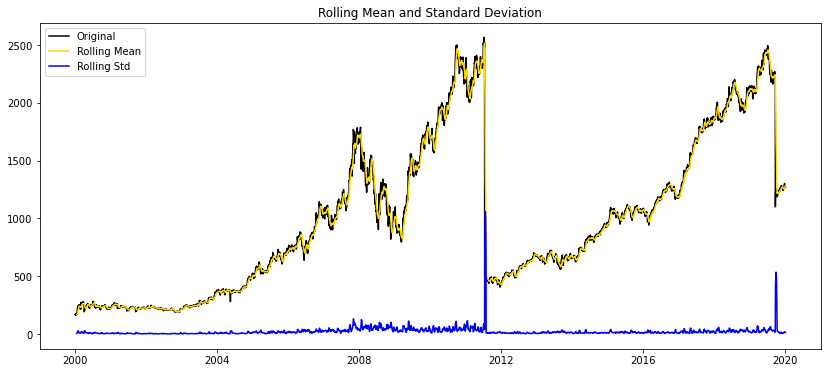

In [12]:
plt.figure(figsize=(14,6))
# ploting original series
plt.plot(df_close, color='black',label='Original')
# ploting rolling mean(12 days) of the original series 
plt.plot(rolmean, color='gold', label='Rolling Mean')
# ploting rolling standard deviation(12 days) of the original series
plt.plot(rolstd, color='blue', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.savefig('Rolling Mean and Standard Deviation.jpeg',bbox_inches='tight', pad_inches=1)
plt.show()

# test of staionarity using Augmented Dickey–Fuller test
  ## Akaike's Information Criteria is used for choosing lag

In [13]:
print("Results of dickey fuller test")
adf = adfuller(df_close,autolag='AIC')
print("test statistics ------  [%s] "%adf[0])
print("p-value ------- [%s] "%adf[1])
print("No. of lags used ------ [%s] "%adf[2])
print("Number of observations used ------ [%s] "%adf[3])



Results of dickey fuller test
test statistics ------  [-2.2251062302198066] 
p-value ------- [0.19725984126059054] 
No. of lags used ------ [0] 
Number of observations used ------ [4973] 


In [14]:
 for key,values in adf[4].items():
        print('critical value (%s) ------- [%f]'%(key ,values))
    

critical value (1%) ------- [-3.431666]
critical value (5%) ------- [-2.862121]
critical value (10%) ------- [-2.567079]


# We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In [15]:
# For time series analysis we separate Trend and Seasonality from the time series.

<ipython-input-16-065d2e7ae019>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_close, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

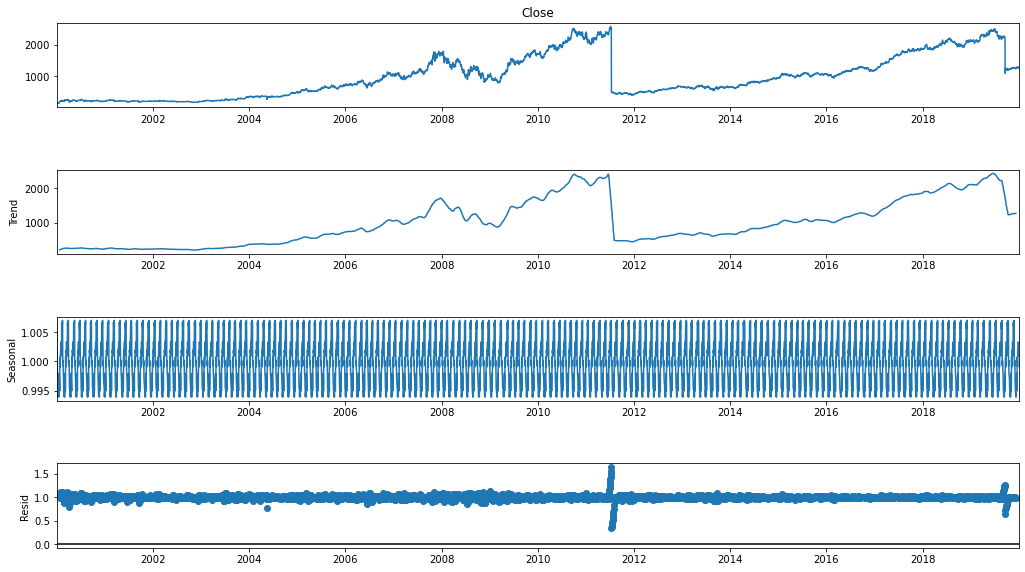

In [16]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot() 
fig.set_size_inches(16, 9)

# after 1 shift the data becomes staionarity hence we can use ARIMA model with d=1 and p & q we find out by pacf and acf plot

In [17]:
df['Close_diff']=df['Close']-df['Close'].shift(1)
close_diff=df['Close_diff'].dropna()

In [18]:
adf = adfuller(close_diff,autolag='AIC')
print("test statistics ------  [%s] "%adf[0])
print("p-value ------- [%s] "%adf[1])
print("No. of lags used ------ [%s] "%adf[2])
print("Number of observations used ------ [%s] "%adf[3])

test statistics ------  [-71.15059191422857] 
p-value ------- [0.0] 
No. of lags used ------ [0] 
Number of observations used ------ [4972] 


<AxesSubplot:xlabel='Date'>

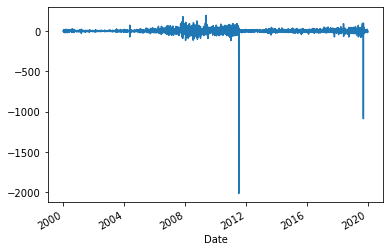

In [19]:
close_diff.plot()

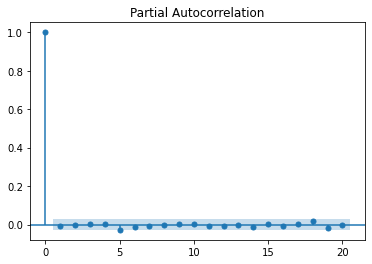

In [20]:
plot_pacf(close_diff, lags=20)
plt.show()

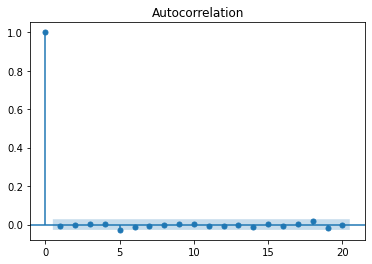

In [21]:
plot_acf(close_diff, lags=20)
plt.show()

In [22]:
close_diff_train=close_diff['2000-01':'2017-12']

In [23]:
close_diff_test=close_diff['2018-01':'2019-12']

In [30]:
date_in=close_diff_test.to_frame()
date_index=date_in.index

# AR model

In [27]:
model_ar=AutoReg(close_diff_train,lags=0,seasonal=False).fit()


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [29]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:             Close_diff   No. Observations:                 4482
Model:                     AutoReg(0)   Log Likelihood              -22395.159
Method:               Conditional MLE   S.D. of innovations             35.793
Date:                Mon, 11 Oct 2021   AIC                              7.156
Time:                        13:47:06   BIC                              7.159
Sample:                             0   HQIC                             7.157
                                 4482                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3798      0.535      0.710      0.477      -0.668       1.428


In [33]:
pred_ar=model_ar.predict(start=4482,end=4972)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


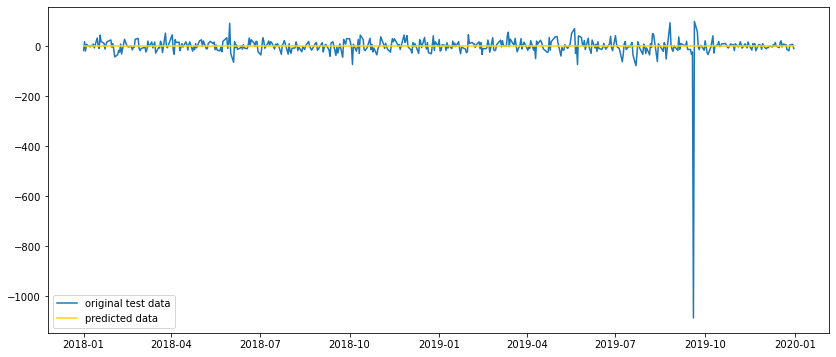

In [34]:
plt.figure(figsize=(14,6))
plt.plot(close_diff_test,label='original test data')
plt.plot(date_index,pred_ar, color='gold',label='predicted data')
plt.legend(loc='best')
plt.show()


# ARMA model

In [35]:
model = ARIMA(close_diff_train, order=(0,0,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency infor

                              ARMA Model Results                              
Dep. Variable:             Close_diff   No. Observations:                 4482
Model:                     ARMA(0, 0)   Log Likelihood              -22395.159
Method:                           css   S.D. of innovations             35.793
Date:                Mon, 11 Oct 2021   AIC                          44794.319
Time:                        13:55:00   BIC                          44807.134
Sample:                             0   HQIC                         44798.835
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3798      0.535      0.710      0.477      -0.668       1.428


<Figure size 1008x576 with 0 Axes>

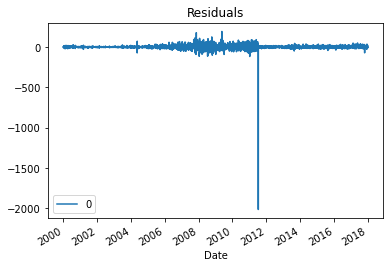

In [36]:
# Plot residual errors
plt.figure(figsize=(14,8))
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

<Figure size 1008x576 with 0 Axes>

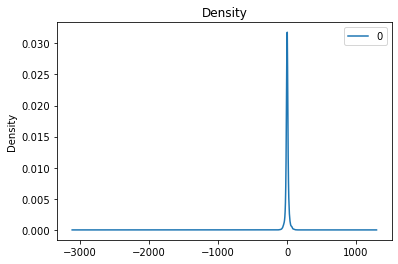

In [37]:
plt.figure(figsize=(14,8))

residuals.plot(kind='kde', title='Density')

plt.show()

In [38]:
pred=model_fit.predict(start=4482,end=4972)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


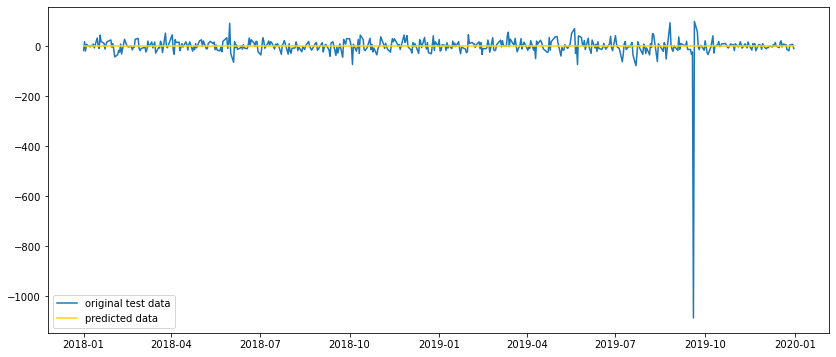

In [39]:
plt.figure(figsize=(14,6))
plt.plot(close_diff_test,label='original test data')
plt.plot(date_index,pred, color='gold',label='predicted data')
plt.legend(loc='best')
plt.show()


# AUTO ARIMA

In [40]:
train=df['2000-01':'2017-12']

In [41]:
train_df=train['Close']

In [42]:
test=df['2018-01':'2019-12']

In [43]:
test_df=test['Close']

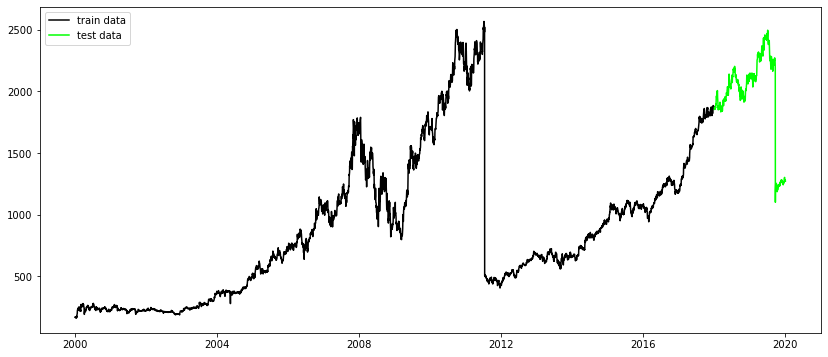

In [44]:
plt.figure(figsize=(14,6))
plt.plot(train_df,color='black',label='train data')
plt.plot(test_df,color='lime',label='test data')
plt.legend()
plt.show()

In [45]:
from pmdarima.arima import auto_arima

In [46]:
model_autoARIMA = auto_arima(train_df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44794.319, Time=1.60 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44796.315, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44796.317, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44792.824, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44798.301, Time=1.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.705 seconds


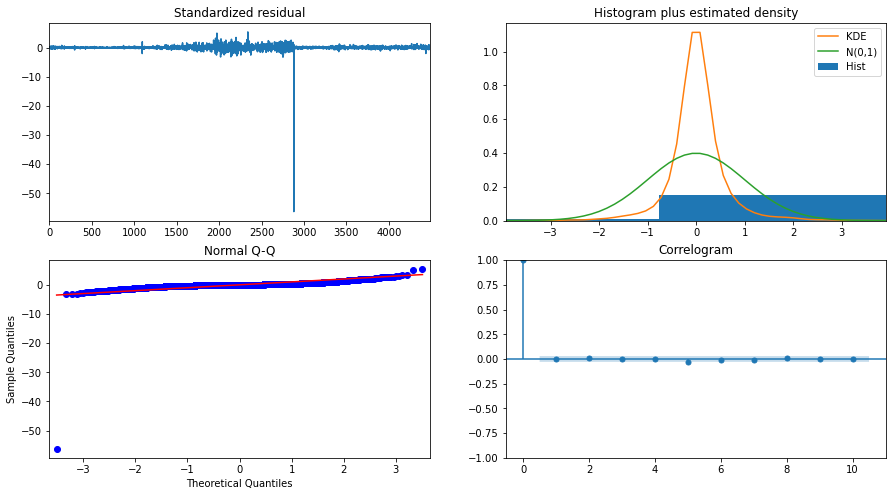

In [47]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [48]:
def forecast_one_step(model):
    fc = model.predict(n_periods=1)
    return (
        fc.tolist()[0])

forecasts = []

for new_ob in test_df:
    fc= forecast_one_step(model_autoARIMA)
    forecasts.append(fc)

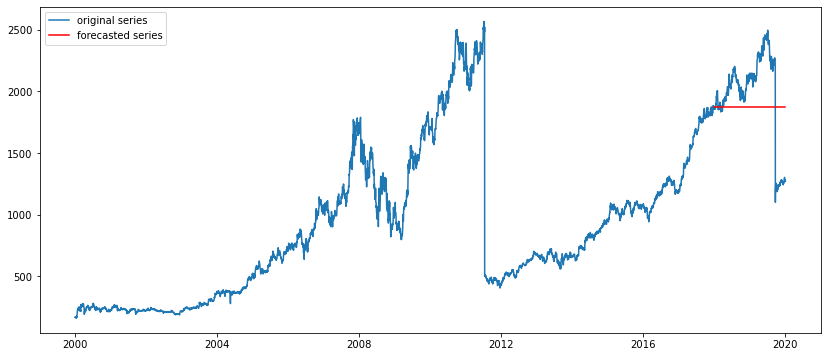

In [49]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='original series')
plt.plot(test_df.index, forecasts , color='red',label='forecasted series')
plt.legend()
plt.show()

In [50]:
mean_squared_error(test_df,forecasts)

127085.96865580448

In [51]:
mean_absolute_error(test_df,forecasts)

293.4107942973523